# Forecast of Weather Temperatures

## Problem Statement

We would like to forecast the temperatures if we know the temperature of the previous days

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


forecast es la denominación en inglés para predicciones de series temporales.

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("data/GlobalTemperatures.csv")
df=df[["dt","LandAverageTemperature"]]
df.columns=["date","t0"]

In [22]:
input_col = []
for i in range(1,10):
    input_col.append("t"+str(i))
    df["t"+str(i)]=df["t0"].shift(i)

In [23]:
df=df.dropna()

In [24]:
df.head()

,date,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9
9,1750-10-01,6.367,11.413,14.750,15.868,12.937,11.573,8.490,5.626,3.083,3.034
42,1753-07-01,15.092,14.585,12.186,8.272,5.424,0.715,2.039,5.086,7.335,7.839
43,1753-08-01,14.148,15.092,14.585,12.186,8.272,5.424,0.715,2.039,5.086,7.335
44,1753-09-01,13.322,14.148,15.092,14.585,12.186,8.272,5.424,0.715,2.039,5.086
45,1753-10-01,8.962,13.322,14.148,15.092,14.585,12.186,8.272,5.424,0.715,2.039


In [25]:
X=df[input_col]
y=df["t0"]

Va del 1750 al 2015

In [27]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

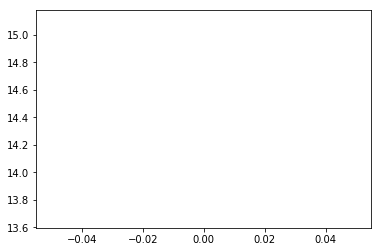

In [28]:
plt.plot(df["t0"].iloc[12])

Cada columna tiene valores del pasado.
Arima es un algoritmo matemático muy usado para problemas con series temporales

Básicamente quiero predecir la temperatura del mes siguiente basado en este mes y los 9 meses anteriors

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
cls_knn = KNeighborsRegressor(n_neighbors=5)


In [31]:
cross_val_score(cls_knn,X,y,scoring="neg_mean_absolute_error")

array([-1.031447  , -0.40698114, -0.51536762])

In [32]:
#se ponen en negativo porque lo que se quiere es maximizar el error. GridSearch siempre intenta maximizar el número

In [33]:
cross_val_score(cls_knn,X,y,scoring="neg_mean_absolute_error").mean()

-0.6512652549197288

In [34]:
np.sqrt(-cross_val_score(cls_knn,X,y,scoring="neg_mean_squared_error").mean())

0.9584181332458045

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
regg = GridSearchCV(KNeighborsRegressor(n_neighbors=1),
                   param_grid={"n_neighbors":range(1,100)},
                   scoring="neg_mean_squared_error")

In [37]:
regg.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [38]:
np.sqrt(-regg.best_score_)

0.951375228397986

In [39]:
regg.best_params_

{'n_neighbors': 9}

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [48]:
model_dt = GridSearchCV(DecisionTreeRegressor(min_samples_leaf=1, max_depth=1),
                   param_grid={"max_depth":range(2,5), "min_samples_leaf":[10,20,30,40,50,60,70]},
                   scoring="neg_mean_squared_error")

model_dt.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 5), 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [51]:
print(model_dt.best_params_)
print(np.sqrt(-model_dt.best_score_))

{'max_depth': 4, 'min_samples_leaf': 20}
1.3827316164283305


In [41]:


model_rf = GridSearchCV(RandomForestRegressor(min_samples_leaf=30, n_estimators=100),
                   param_grid={"min_samples_leaf":range(1,5)},
                   scoring="neg_mean_squared_error")

model_rf.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=30, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [42]:
np.sqrt(-model_rf.best_score_)

1.0856605798812504

In [43]:
model_rf.best_params_

{'min_samples_leaf': 1}

In [44]:
model_xgb = GridSearchCV(XGBRegressor(n_estimators=100),
                   param_grid={},
                   scoring="neg_mean_squared_error")

model_xgb.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [45]:
np.sqrt(-model_xgb.best_score_)

1.0787674993408851

In [46]:
model_gbr = GridSearchCV(GradientBoostingRegressor(n_estimators=100),
                   param_grid={},
                   scoring="neg_mean_squared_error")

model_gbr.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [47]:
np.sqrt(-model_gbr.best_score_)

1.0962161922391545